# Import Package dan Data Collecting

In [1]:
#======= Modelling =====
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics

import warnings
warnings.filterwarnings("ignore")
import datetime as dt

#======= Pandas confiq =====
import pandas as pd

#==== Numpy ======
import numpy as np

#===== Visualization =====
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
customer = pd.read_csv('Case Study - Customer.csv', sep=';')
product = pd.read_csv('Case Study - Product.csv', sep=';')
store = pd.read_csv('Case Study - Store.csv', sep=';')
transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')

# Data Preprocessing

**Change data type**

In [3]:
transaction = transaction.astype({
    'Price':'float',
    'TotalAmount':'float',
    'Date':'datetime64'
})

transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   float64       
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   float64       
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 313.9+ KB


In [4]:
product = product.astype({
    'price':'float'
})

product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   productid  10 non-null     object 
 1   product    10 non-null     object 
 2   price      10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   float64       
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   float64       
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 313.9+ KB


**Merging Data**

In [6]:
df = transaction.merge(product[['productid','product']],how='left', left_on='ProductID', right_on='productid')
df = df.merge(customer, how='left', left_on='CustomerID', right_on='customerid')
df = df.merge(store[['StoreID','StoreName','GroupStore','Type']], how='left', left_on='StoreID', right_on='StoreID')
df = df[['TransactionID',
        'CustomerID',
        'Date',
        'ProductID',
        'Price',
        'Qty',
        'TotalAmount',
        'StoreID',
        'product',
        'age',
        'gender',
        'income',
        'StoreName',
        'GroupStore',
        'Type']]

df = df.astype({
    'CustomerID':'object',
    'ProductID':'object',
    'StoreID':'object'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   object        
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   float64       
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   float64       
 7   StoreID        5020 non-null   object        
 8   product        5020 non-null   object        
 9   age            5020 non-null   int64         
 10  gender         5020 non-null   int64         
 11  income         5020 non-null   float64       
 12  StoreName      5020 non-null   object        
 13  GroupStore     5020 non-null   object        
 14  Type           5020 non-null   object        
dtypes: datetime64[ns](1),

**Check Missing Value**

In [7]:
df.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
product          0
age              0
gender           0
income           0
StoreName        0
GroupStore       0
Type             0
dtype: int64

In [8]:
df_clus = df.groupby(['CustomerID']).agg({'TransactionID':pd.Series.nunique, 'Qty':'sum', 'TotalAmount':'sum'})
df_clus = df_clus.reset_index()
df_clus

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300.0
1,2,13,57,392300.0
2,3,15,56,446200.0
3,4,10,46,302500.0
4,5,7,27,268600.0
...,...,...,...,...
442,443,16,59,485100.0
443,444,18,62,577700.0
444,445,18,68,587200.0
445,446,11,42,423300.0


In [9]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,product,age,gender,income,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500.0,4,30000.0,12,Crackers,36,0,10.53,Prestasi Utama,Prestasi,General Trade
1,TR16356,165,2022-01-01,P9,10000.0,7,70000.0,1,Yoghurt,44,1,14.58,Prima Tendean,Prima,Modern Trade
2,TR1984,183,2022-01-01,P1,8800.0,4,35200.0,4,Choco Bar,27,1,0.18,Gita Ginara,Gita,General Trade
3,TR35256,160,2022-01-01,P1,8800.0,7,61600.0,4,Choco Bar,48,1,12.57,Gita Ginara,Gita,General Trade
4,TR41231,386,2022-01-01,P9,10000.0,1,10000.0,4,Yoghurt,33,0,6.95,Gita Ginara,Gita,General Trade


# Exploratory Data Analysis (1)

In [10]:
#overview data
trx = pd.DataFrame([{
'transactions': len(df['TransactionID'].value_counts()),
'customers': len(df['CustomerID'].value_counts()),
'product': len(df['ProductID'].value_counts()),
'store': len(df['StoreID'].value_counts())}],
columns = [ 'transactions', 'customers', 'product', 'store'], index = ['frequency'])
print(trx)

           transactions  customers  product  store
frequency          4908        447       10     14


In [11]:
df.describe(include='object').T

,count,unique,top,freq
TransactionID,5020,4908,TR71313,3
CustomerID,5020,447,156,21
ProductID,5020,10,P5,814
StoreID,5020,14,9,370
product,5020,10,Thai Tea,814
StoreName,5020,12,Lingga,738
GroupStore,5020,7,Prima,1085
Type,5020,2,General Trade,2851


Dari hasil explorasi data kategorikal didapatkan bahwa:
- Thai Tea adalah produk yang paling sering dibeli oleh customer
- Lingga adalah toko dengan jumlah transaksi terbanyak diantara toko yang lain
- Customer cenderung lebih suka bertransaksi pada tipe toko general trade
- Customer ID 156 adalah customer yang paling sering melakukan transaksi

In [12]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Price,5020.0,9684.800797,4600.708780,3200.0,4200.00,9400.00,15000.00,18000.0
Qty,5020.0,3.644622,1.855295,1.0,2.00,3.00,5.00,10.0
TotalAmount,5020.0,32279.482072,19675.462455,7500.0,16000.00,28200.00,47000.00,88000.0
age,5020.0,40.003586,12.834719,0.0,30.00,39.00,51.00,72.0
gender,5020.0,0.452988,0.497835,0.0,0.00,0.00,1.00,1.0
income,5020.0,8.623713,6.518242,0.0,4.22,7.72,10.78,71.3


Dari hasil eksplorasi data numerik didapatkan bahwa:
- Harga terendah untuk produk adalah Rp3200 per pcs dan harga tertinggi adalah Rp18.000 per pcs
- 1 Customer dapat membeli 1 produk dengan kuantitas mencapai 10
- Total amount yang dikeluarkan customer paling banyak adalah Rp88.000 dengan rata rata Rp32.000 untuk setiap transaksi
- Income dari customer sendiri beragam, mulai dari yang belum berpenghasilan sampai 71 juta perbulan

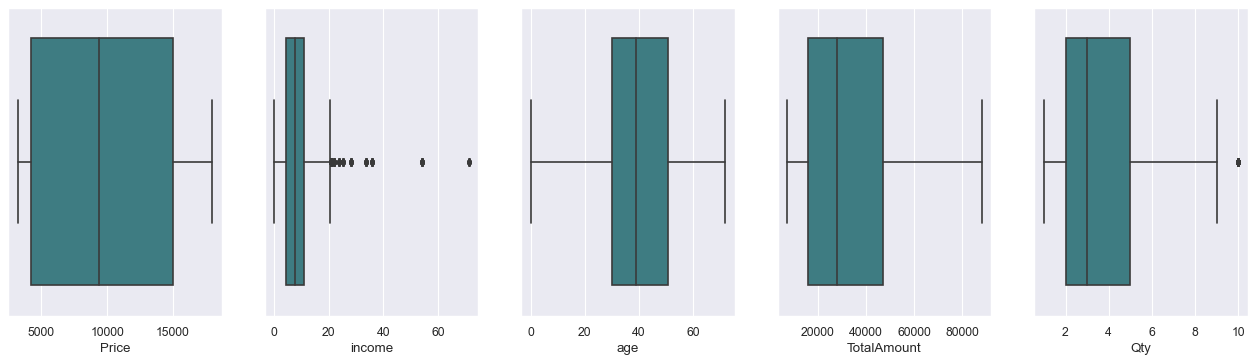

In [13]:
df_viz = df[['Price', 'income', 'age', 'TotalAmount', 'Qty']]

fig, axes = plt.subplots(1,5,figsize=(20,5), dpi=80)
for i in range(len(df_viz.columns)):
    sns.boxplot(x=df_viz.columns[i],data=df,palette='crest', ax=axes[i])
plt.show()

Dapat dilihat bahwa dari visualisasi boxplot diatas:
- Rentang harga produk kalbe yang sering transaksi berada di kisaran Rp5.000 - Rp15.000
- Income customer kalbe paling banyak yang bertransaksi tidak lebih dari 20 juta perbulan
- Rentang umur yang sering bertransaksi adalah 35 - 50 tahun
- Customer paling sering mengeluarkan uang untuk bertransaksi berkisar diangka Rp15.000 - 50.000
- Customer dapat membeli 1 produk dengan kuantitas paling banyak berkisar di 2 - 5 dalam 1 kali transaksi

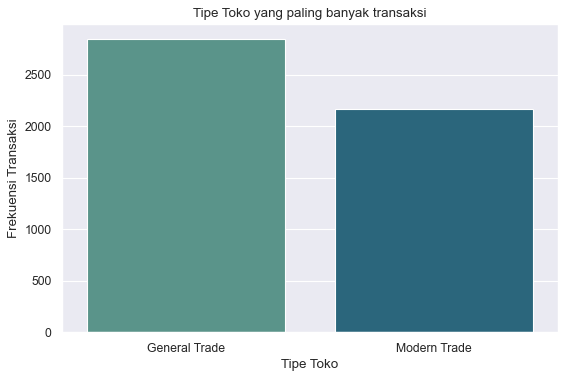

In [14]:
fig, axes = plt.subplots(figsize=(8,5), dpi=80)
sns.barplot(x=list(df['Type'].value_counts(normalize=True).keys()),y=list(df['Type'].value_counts()),ec='white',lw=1,palette='crest', ax=axes)
axes.set_ylabel('Frekuensi Transaksi')
axes.set_xlabel('Tipe Toko')
axes.set_title('Tipe Toko yang paling banyak transaksi')
plt.show()

Dari visualisasi diatas, general trade lebih disukai oleh customer dibandingkan modern trade

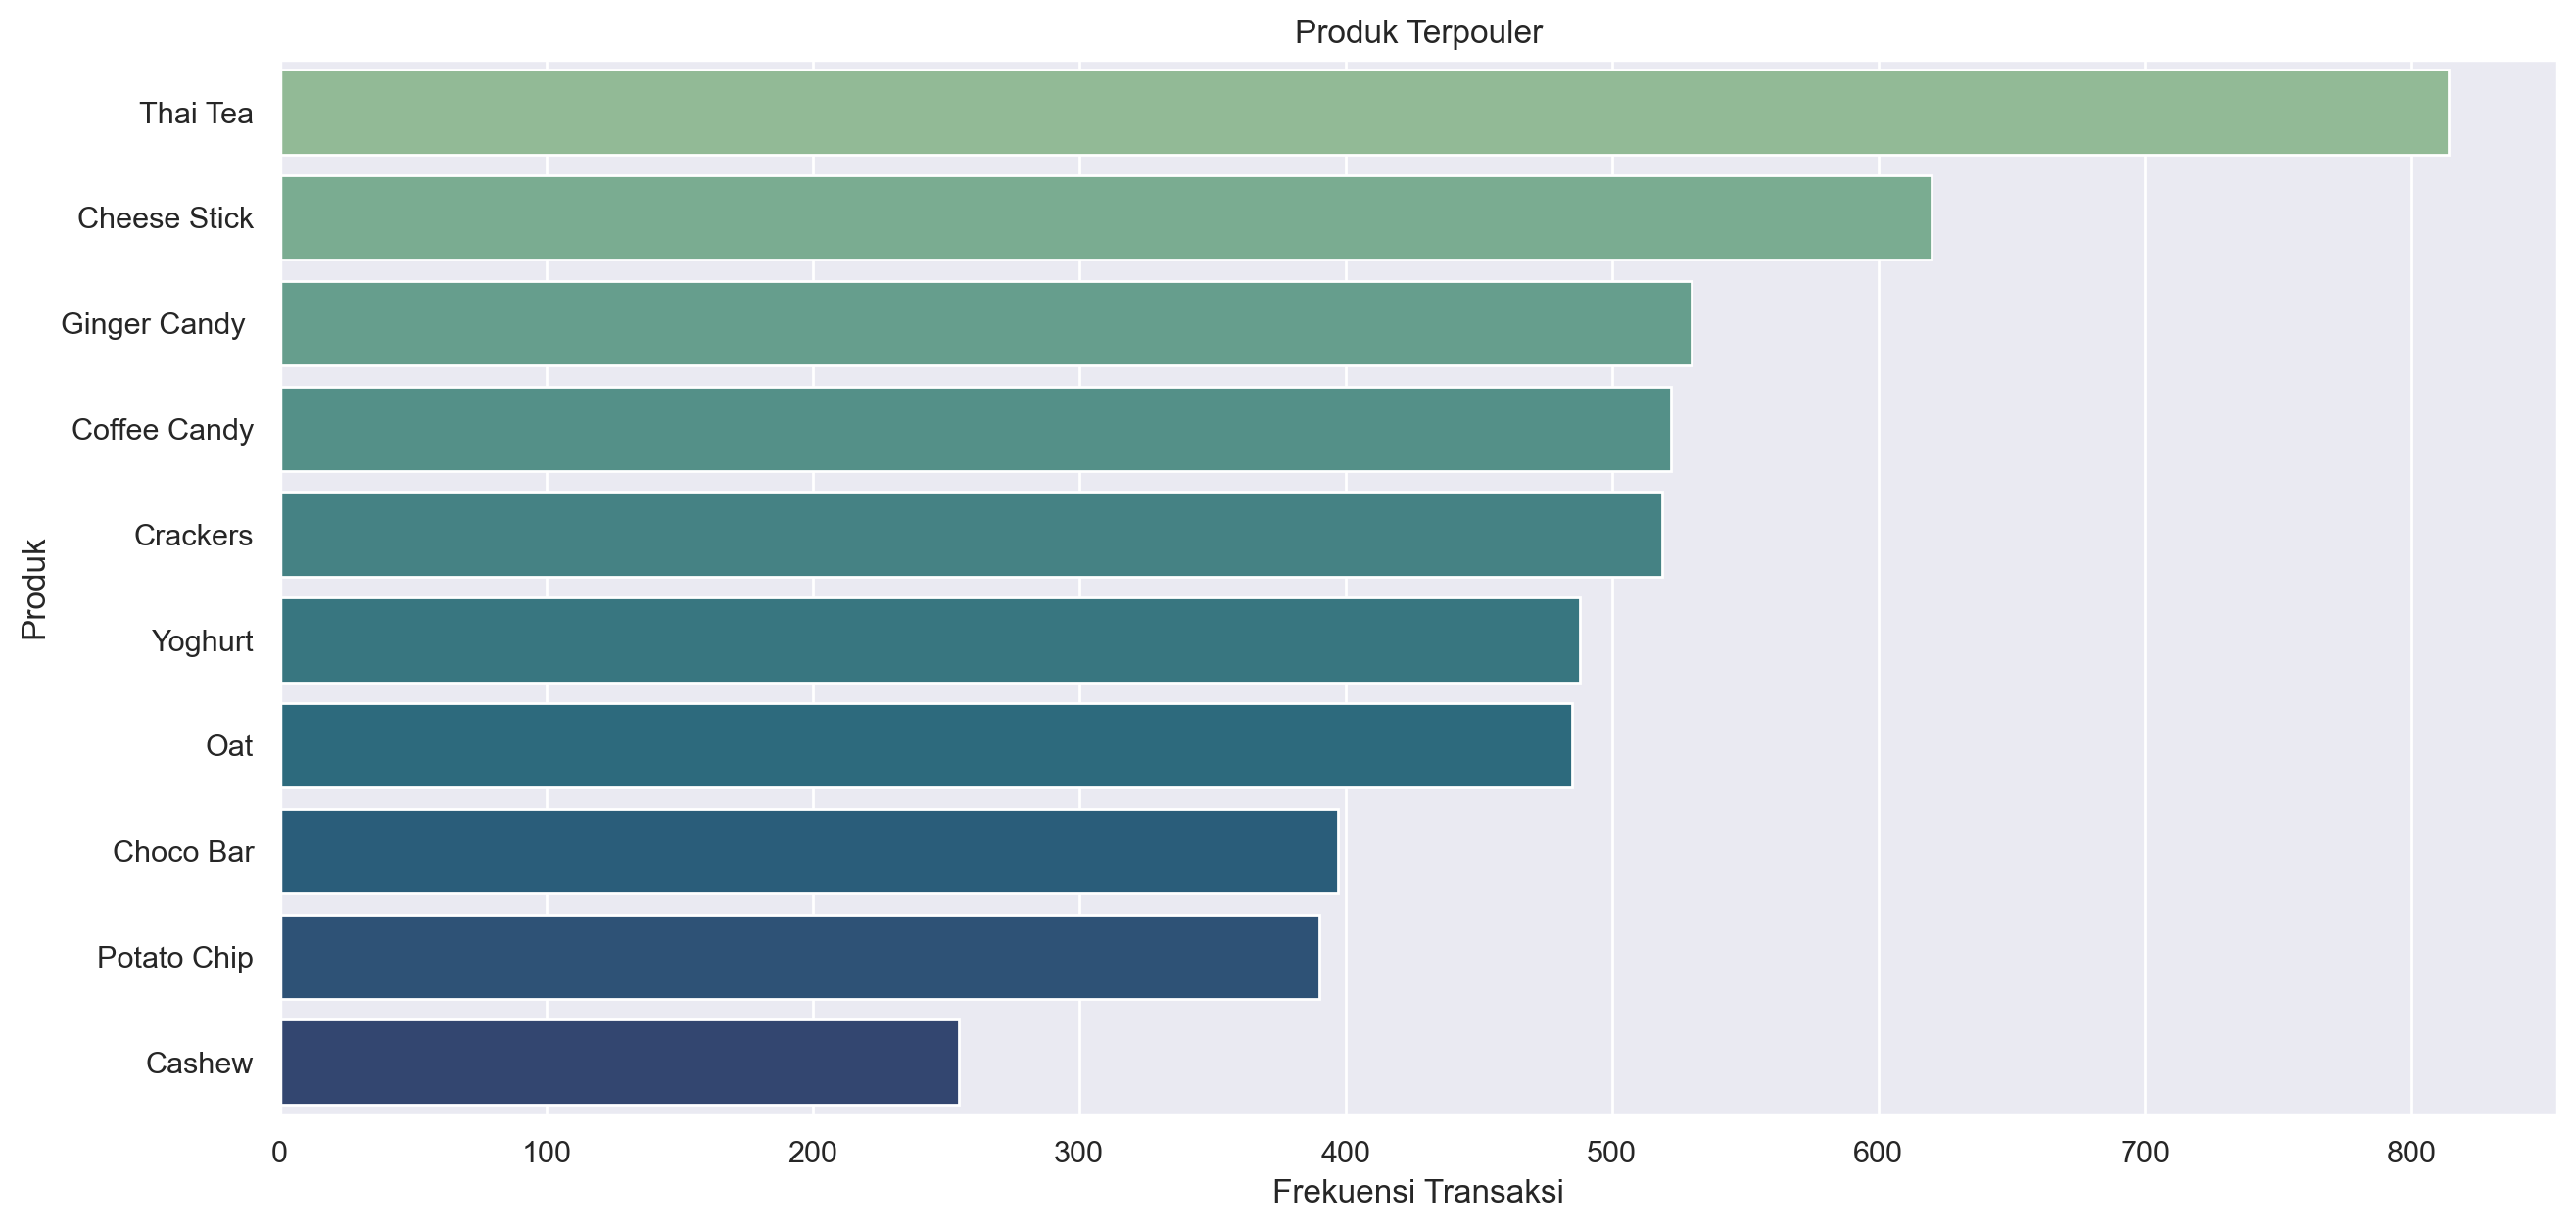

In [15]:
fig, axes = plt.subplots(figsize=(15,7), dpi=200)
sns.barplot(x=list(df['product'].value_counts()),y=list(df['product'].value_counts(normalize=True).keys()),ec='white',lw=1,palette='crest', ax=axes)
axes.set_ylabel('Produk')
axes.set_xlabel('Frekuensi Transaksi')
axes.set_title('Produk Terpouler')
plt.show()

Dari visualisasi diatas, Thai tea adalah produk yang paling sering dibeli oleh customer akan tetapi belum tentu kuantitas per produk nya sama atau bahkan lebih besar dari produk lainnya

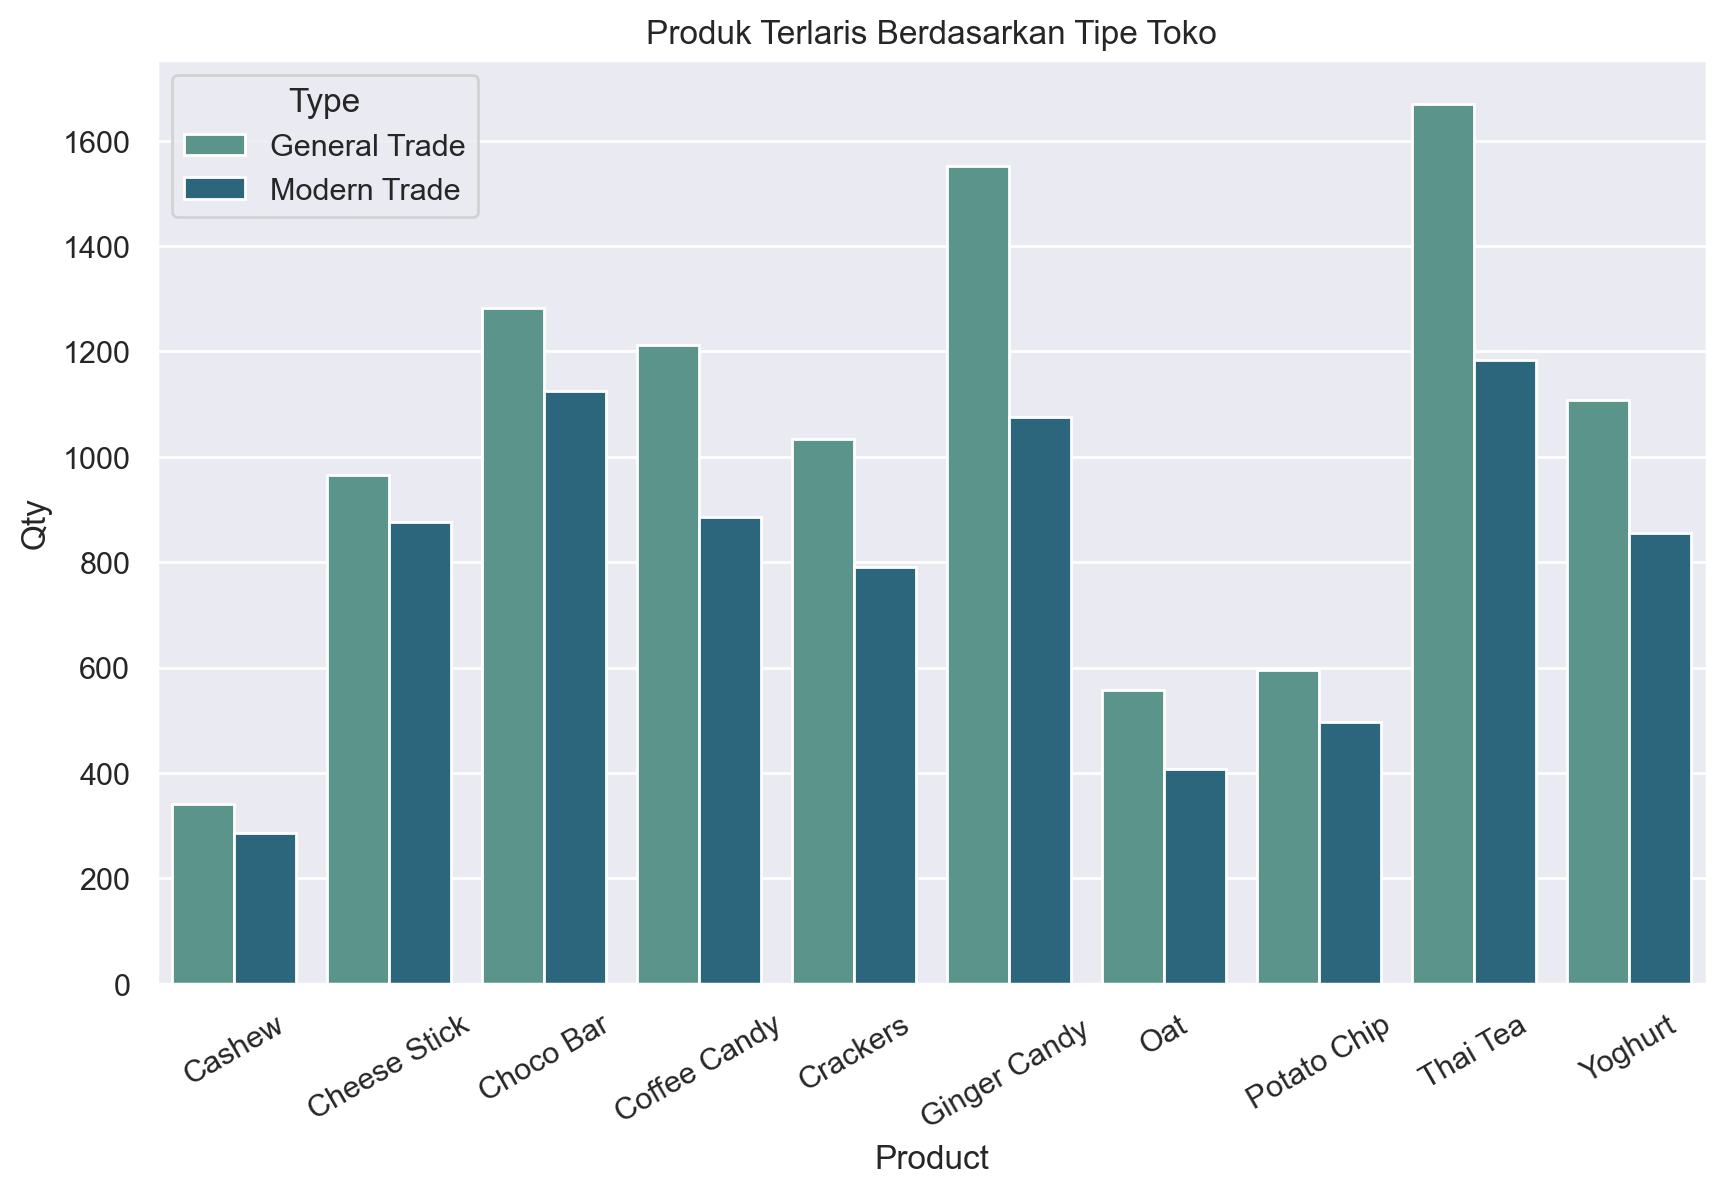

In [16]:
produk_laris = df.groupby(['product','Type'], as_index=False).agg({'Qty':'sum'})
fig, axes = plt.subplots(figsize=(10,6), dpi=200)
sns.barplot(data=produk_laris, y="Qty", x="product", hue="Type", palette='crest', ec='white', lw=1)
plt.title('Produk Terlaris Berdasarkan Tipe Toko')
plt.xlabel('Product')
plt.xticks(rotation=30)
plt.ylabel('Qty')
plt.show()

Dari visualisaisi diatas, produk Thai tea masih yang paling banyak dibeli dalam hal kuantitas, namun produk kedua justu dipegang oleh ginger candy. Dapat dilihat juga general trade masih mendominasi dalam hal transaksi per produknya

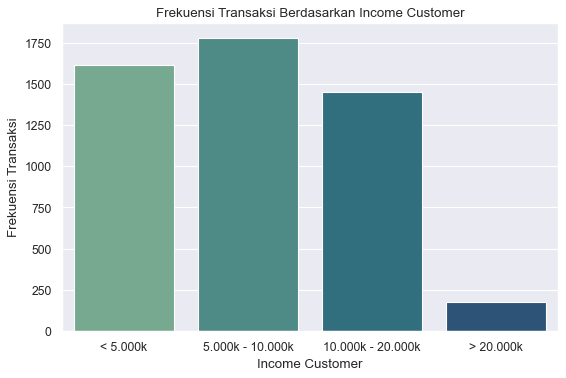

In [17]:
df_1 = df.copy()
df_1['income'] = df_1['income'].map(lambda x: x*1000000)

def income(x):
    if (x>=0) & (x<5000000):
        return "< 5.000k"
    elif (x>=5000000) & (x<10000000):
        return "5.000k - 10.000k"
    elif (x>=10000000) & (x<20000000):
        return "10.000k - 20.000k"
    elif (x>=20000000):
        return "> 20.000k"
df_1['income_clus']=df_1['income'].apply(income)

income_clus_dict = {'< 5.000k':1,'5.000k - 10.000k':2,'10.000k - 20.000k':3, '> 20.000k':4}
df_1=df_1.sort_values('income_clus', key = lambda x : x.apply (lambda x : income_clus_dict[x]))

fig, axes = plt.subplots(figsize=(8,5), dpi=80)
sns.countplot(data=df_1, x='income_clus', ec='white',lw=1,palette='crest', ax=axes)
axes.set_ylabel('Frekuensi Transaksi')
axes.set_xlabel('Income Customer')
axes.set_title('Frekuensi Transaksi Berdasarkan Income Customer')
plt.show()

Dari visualisasi diatas, customer dengan gaji 5 hingga 20 juta masih yang paling banyak melakukan transaksi

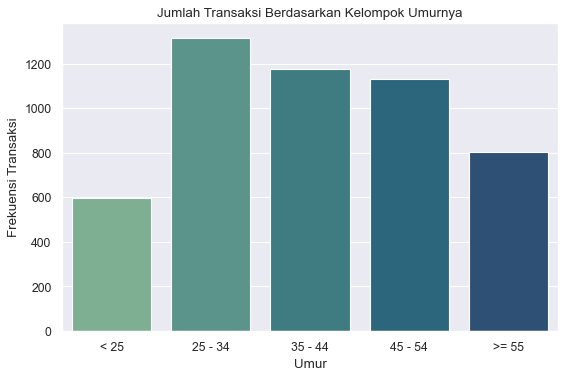

In [18]:
def age(x):
    if (x<25):
        return "< 25"
    elif (x>=25) & (x<35):
        return "25 - 34"
    elif (x>=35) & (x<45):
        return "35 - 44"
    elif (x>=45) & (x<55):
        return "45 - 54"
    elif (x>=55):
        return ">= 55"
df_1['age_clus']=df_1['age'].apply(age)

age_clus_dict = {'< 25':1,'25 - 34':2,'35 - 44':3, '45 - 54':4, '>= 55':5}
df_1=df_1.sort_values('age_clus', key = lambda x : x.apply (lambda x : age_clus_dict[x]))

fig, axes = plt.subplots(figsize=(8,5), dpi=80)
sns.countplot(data=df_1, x='age_clus', ec='white',lw=1,palette='crest', ax=axes)
axes.set_ylabel('Frekuensi Transaksi')
axes.set_xlabel('Umur')
axes.set_title('Jumlah Transaksi Berdasarkan Kelompok Umurnya')
plt.show()

Dari hasil visualisasi diatas, customer dengan rentang umur 25-54 tahun adalah yang paling banyak melakukan transaksi yang dimana customer di rentang umur ini juga adalah usia produktif seseorang untuk bekerja sehingga lebih sering dalam bertransaksi

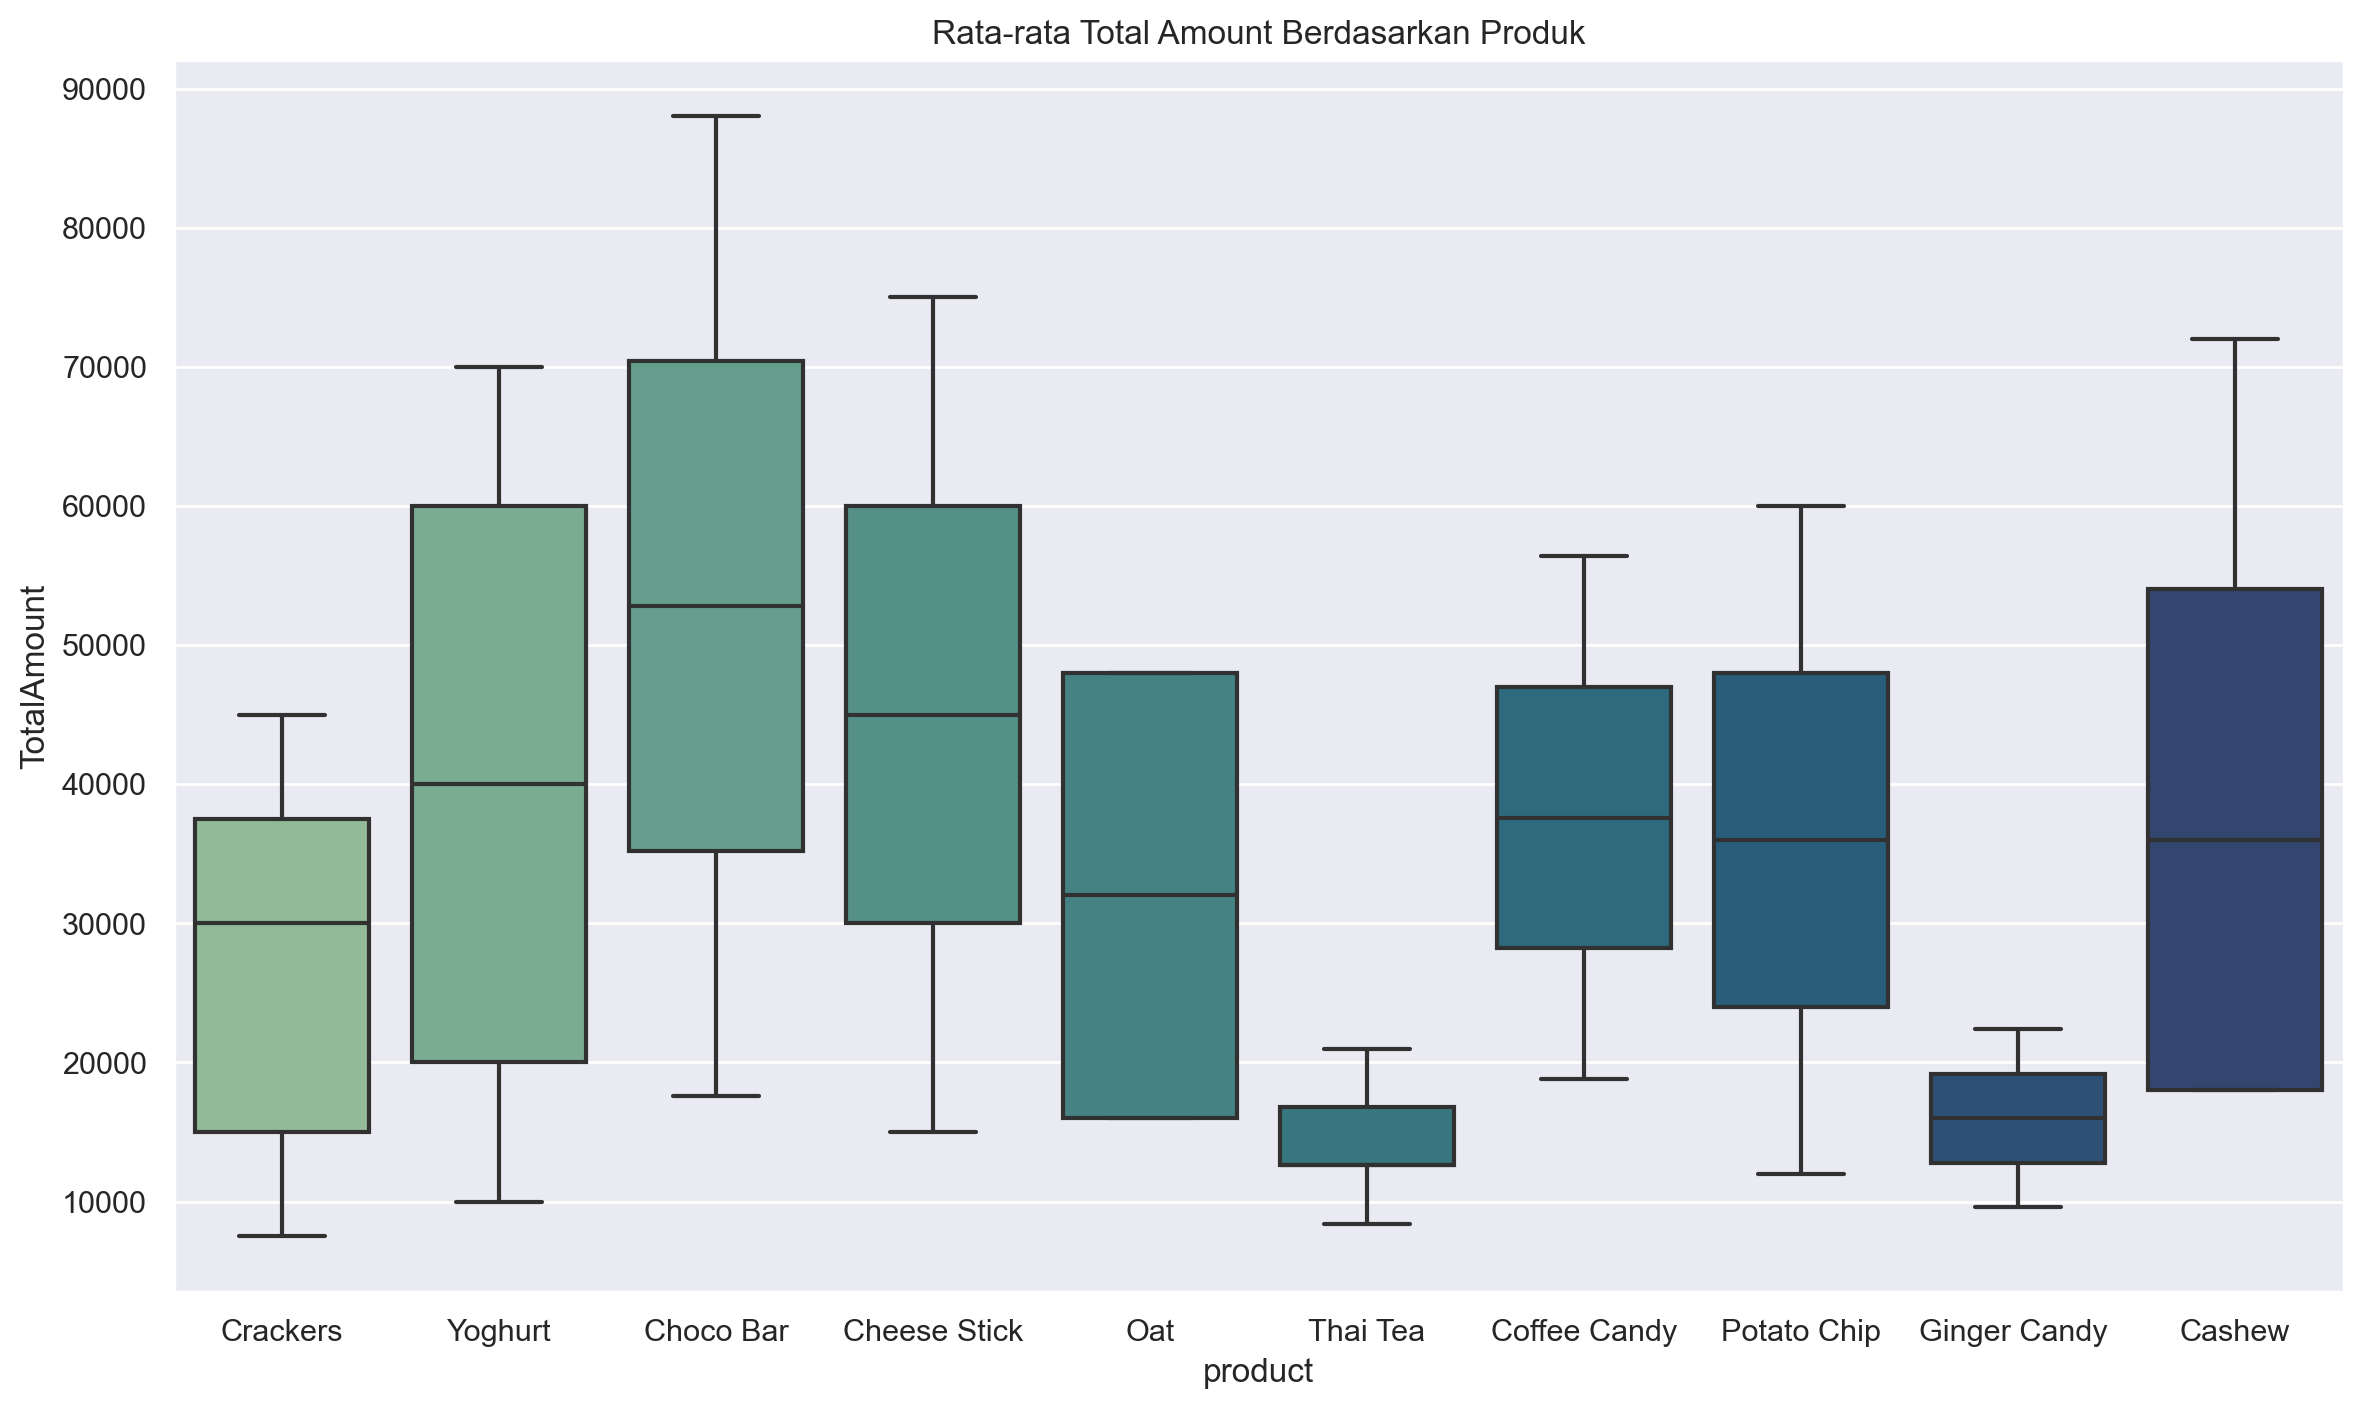

In [19]:
fig, axes = plt.subplots(figsize=(14,8), dpi=200)
sns.boxplot(x='product',y='TotalAmount',data=df, palette='crest')
axes.title.set_text('Rata-rata Total Amount Berdasarkan Produk')
plt.show()

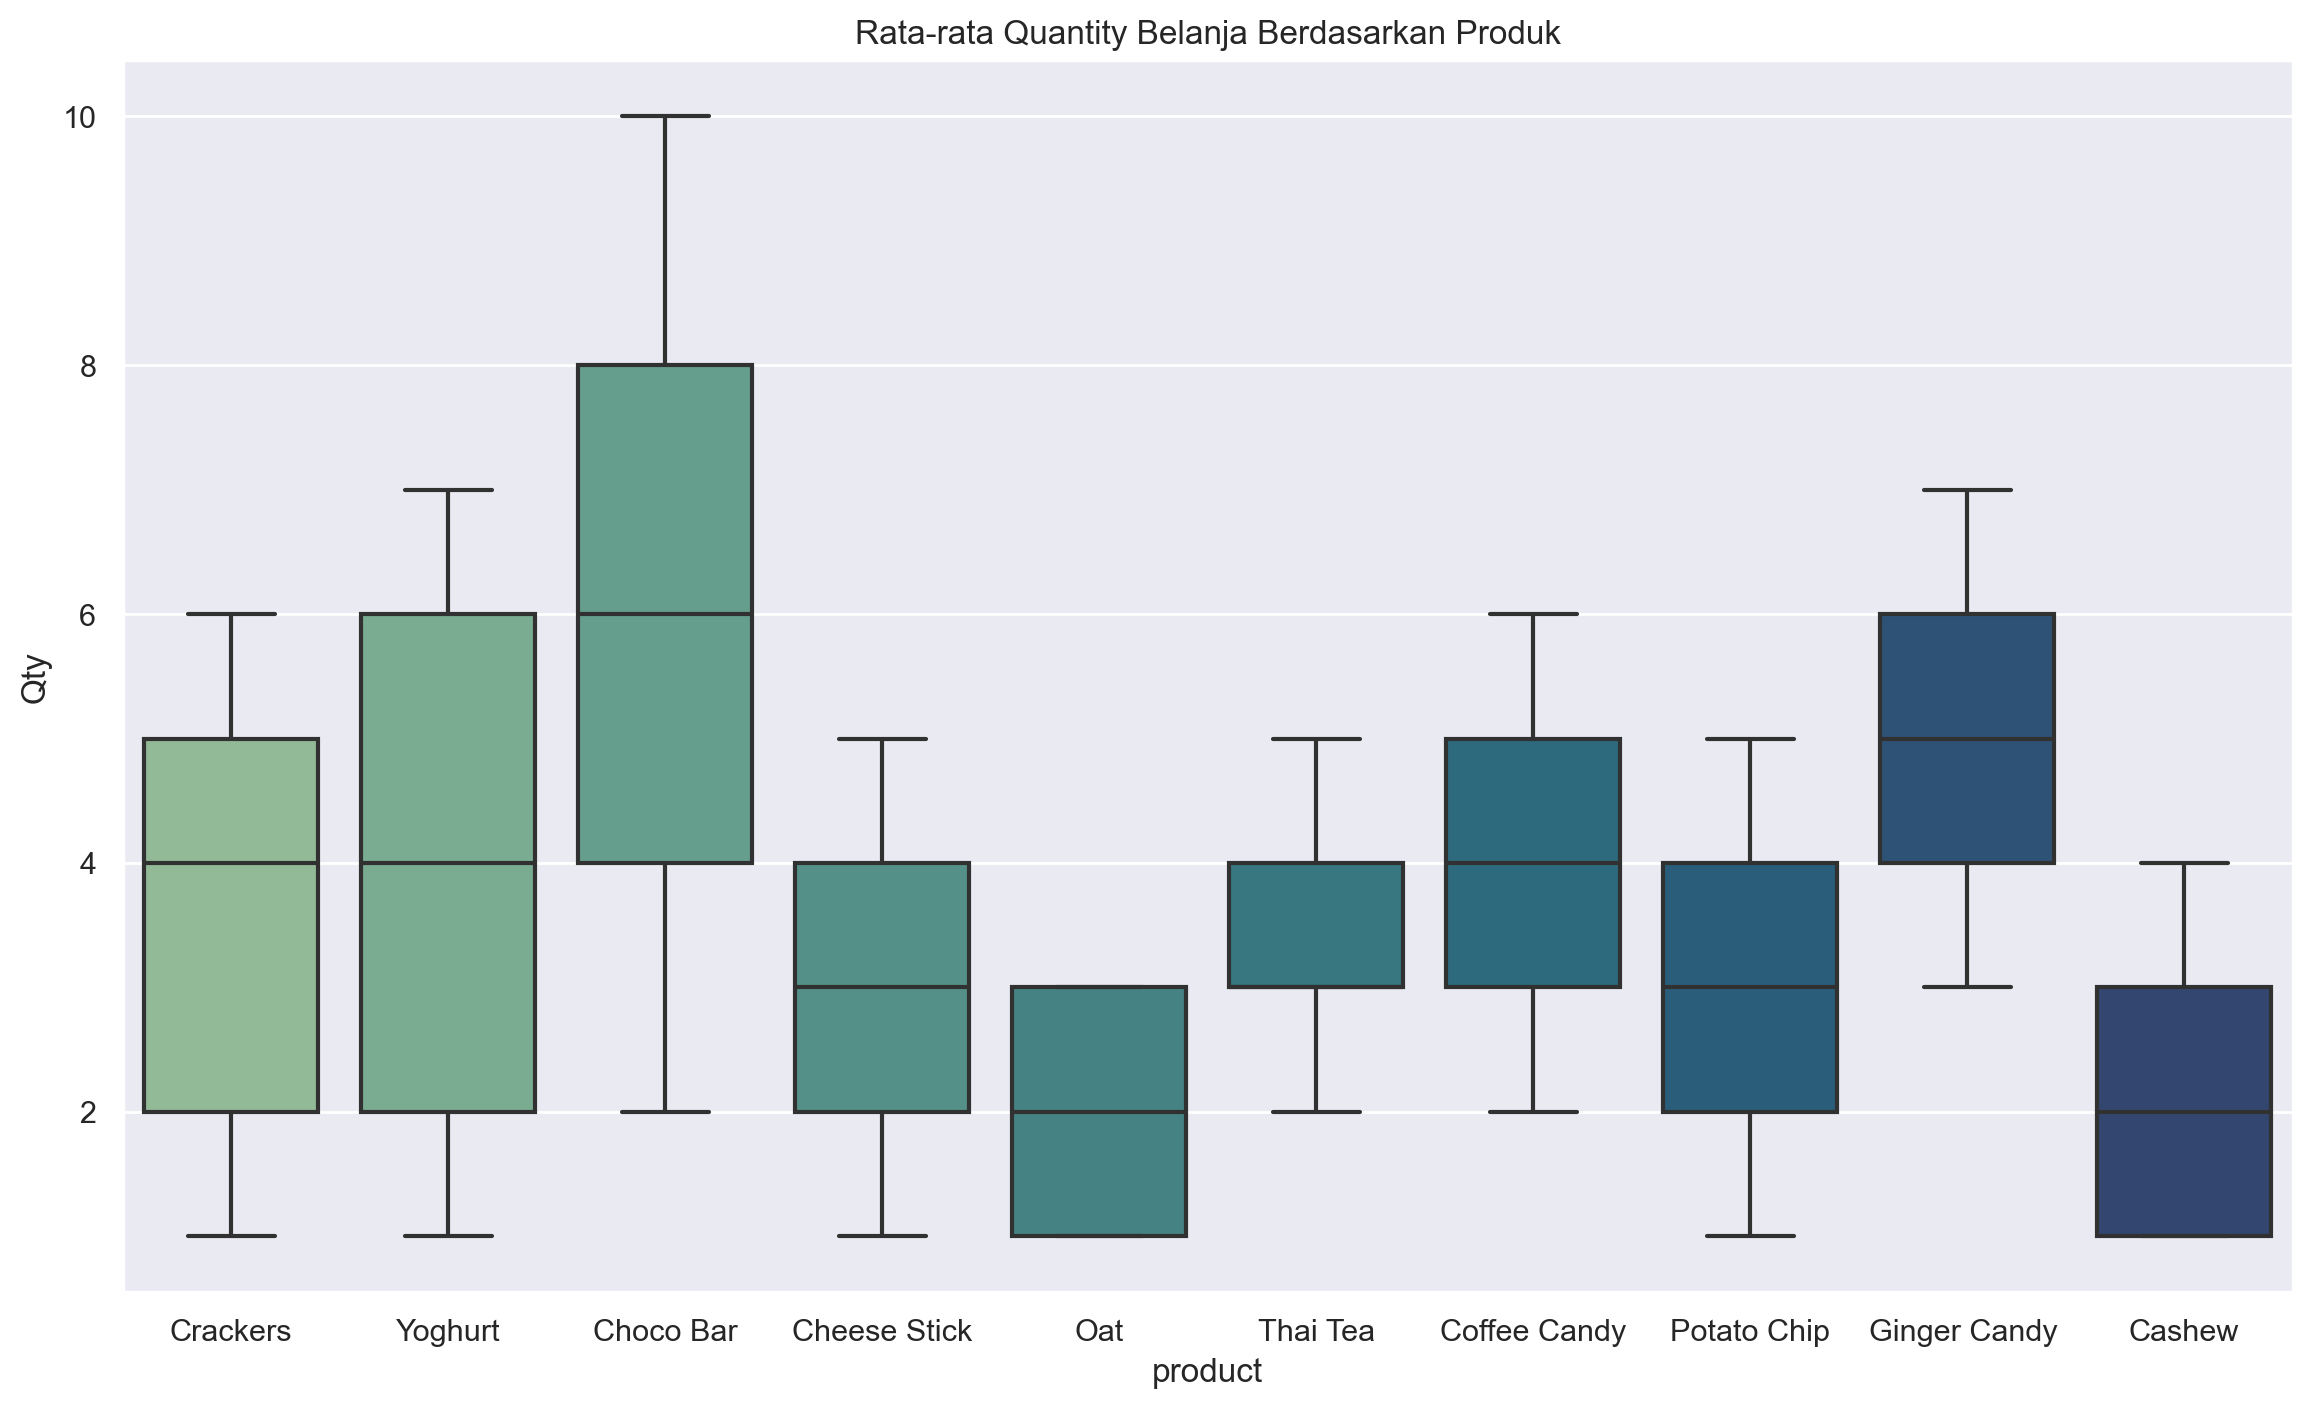

In [20]:
fig, axes = plt.subplots(figsize=(14,8), dpi=200)
sns.boxplot(x='product',y='Qty',data=df, palette='crest')
axes.title.set_text('Rata-rata Quantity Belanja Berdasarkan Produk')
plt.show()

Text(0, 0.5, 'Jumlah Transaksi')

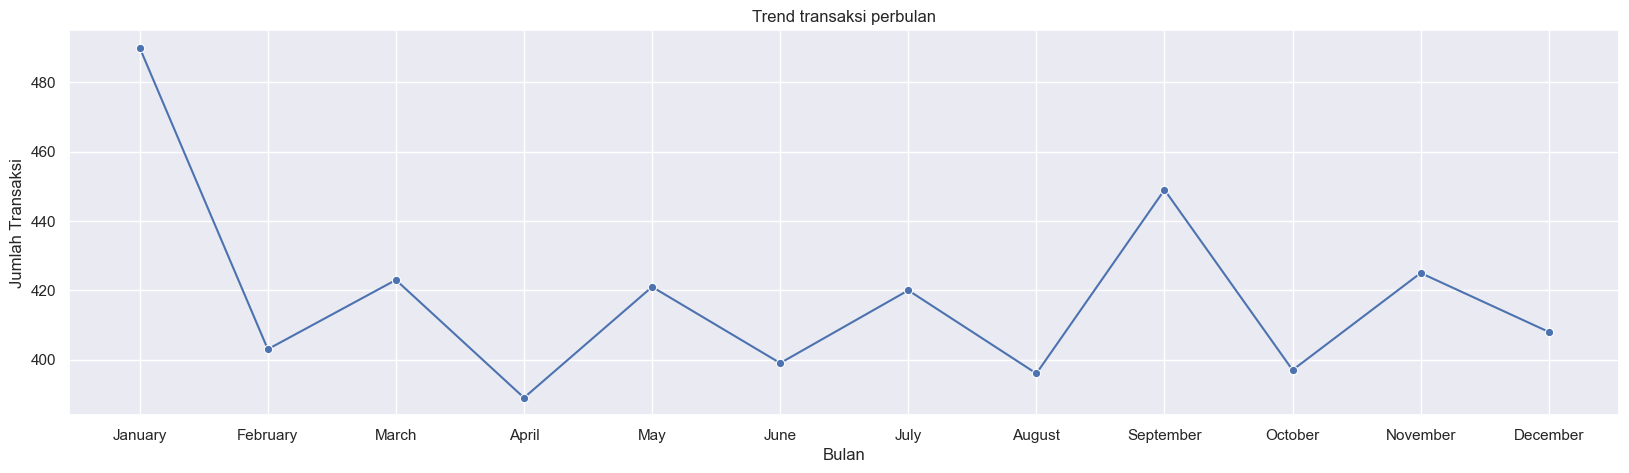

In [21]:
#get month from date column
df_1['month'] = df_1['Date'].dt.month_name()

#TRANSAKSI PER BULAN
transaksi_perbulan=df_1.groupby('month',as_index=False)['TransactionID'].count()
transaksi_perbulan.rename(columns={'TransactionID':'jumlah_transaksi'},inplace=True)

#urutkan bulan
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11,
              'December':12}
transaksi_perbulan=transaksi_perbulan.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

#plotting
fig,axes=plt.subplots(figsize=(20,5))
sns.lineplot(data=transaksi_perbulan, x="month", y="jumlah_transaksi", marker='o')
plt.title('Trend transaksi perbulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')

Dari visualisasi diatas, bulan januari adalah yang paling banyak transaksi sedangkan bulan april adalah yang paling sedikit. Sementara kalau kita lihat pergerakan transaksinya cenderung naik turun dari bulan ke bulan

Text(0, 0.5, 'Total Penjualan (x10juta)')

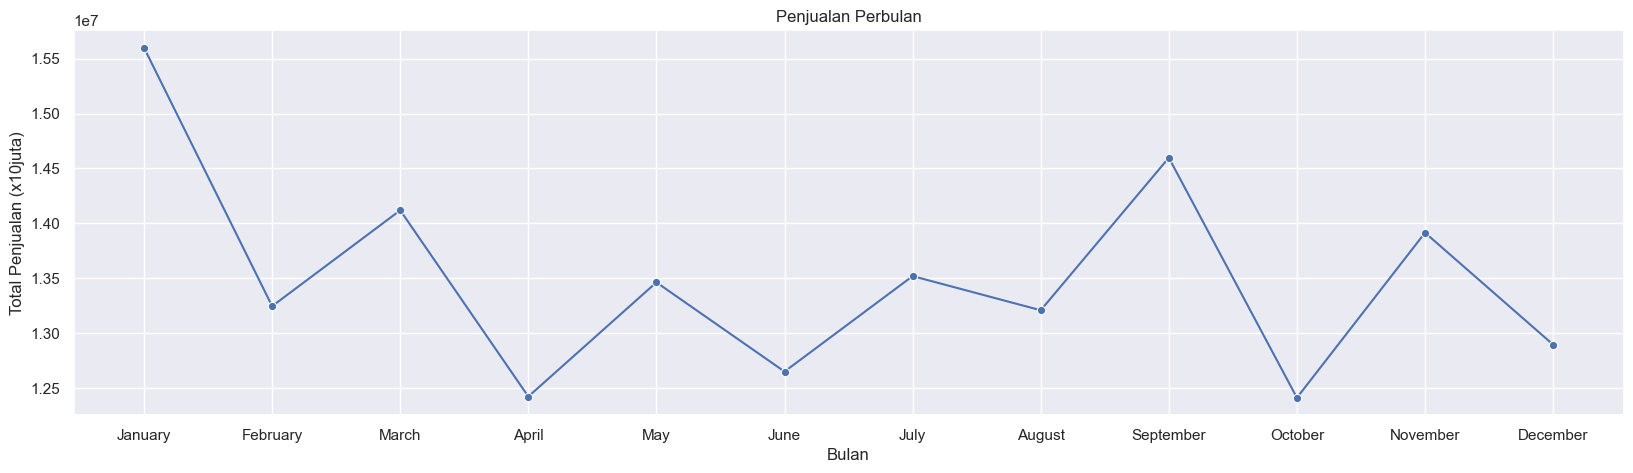

In [22]:
#Penjualan per bulan
penjualan_perbulan=df_1.groupby('month',as_index=False).agg({'TotalAmount':'sum'})
penjualan_perbulan.rename(columns={'TotalAmount':'Penjualan'},inplace=True)

#urutkan bulan
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11,
              'December':12}
penjualan_perbulan=penjualan_perbulan.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

#plotting
fig,axes=plt.subplots(figsize=(20,5))
sns.lineplot(data=penjualan_perbulan, x="month", y="Penjualan", marker='o')
plt.title('Penjualan Perbulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (x10juta)')

Dari visualisasi diatas, Penjualan tertinggi berada pada bulan januari dan terendah pada bulan april. Hal ini berbanding lurus dengan jumlah transaksi perbulan yang dimana penjualan juga mengalami naik turun tiap bulannya.

# Exploratory Data Analysis (2)

In [23]:
df_clus = df_clus.rename(columns={'TransactionID':'FrekuensiTransaksi', 
                                  'Qty': 'QuantityTransaksi',
                                  'TotalAmount' : 'TotalTransaksi'})

In [24]:
df_clus.describe()

,CustomerID,FrekuensiTransaksi,QuantityTransaksi,TotalTransaksi
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,11.230425,40.930649,362512.304251
std,129.182042,3.245302,12.756679,124634.279184
min,1.000000,3.000000,10.000000,92100.000000
25%,112.500000,9.000000,32.000000,271750.000000
50%,224.000000,11.000000,40.000000,354200.000000
75%,335.500000,14.000000,50.000000,441200.000000
max,447.000000,21.000000,79.000000,846700.000000


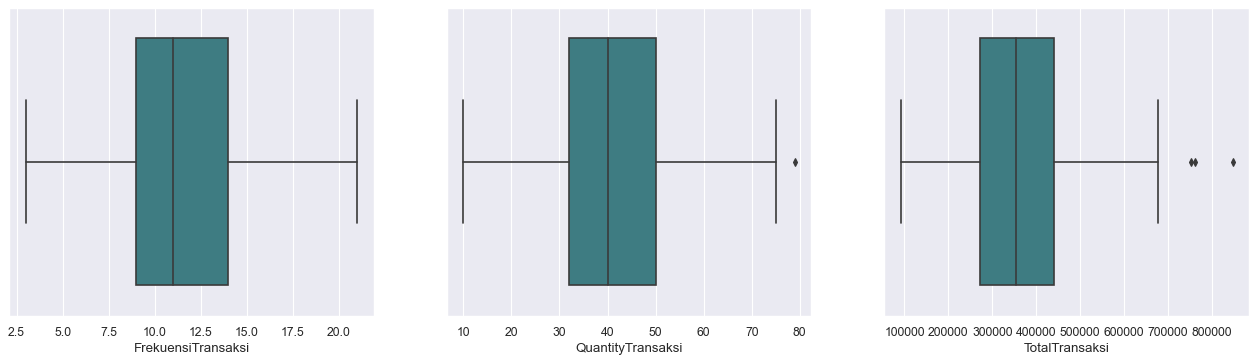

In [25]:
df_viz = df_clus[['FrekuensiTransaksi', 'QuantityTransaksi', 'TotalTransaksi']]

fig, axes = plt.subplots(1,3,figsize=(20,5), dpi=80)
for i in range(len(df_viz.columns)):
    sns.boxplot(x=df_viz.columns[i],data=df_clus,palette='crest', ax=axes[i])
plt.show()

Jika data di grouping menurut customer id, dapat di tarik informasi dari boxplot diatas sebagai berikut:
- Frekuensi transaksi per customer memiliki jangkauan mulai dari 3 hingga 21 transaksi selama 1 tahun
- Quantity produk yang dibeli customer memiliki jangkauan mulai dari 10 hingga 71 produk selama 1 tahun
- Total amount customer berada di rentang 92.000 hingga 846.000 selama customer

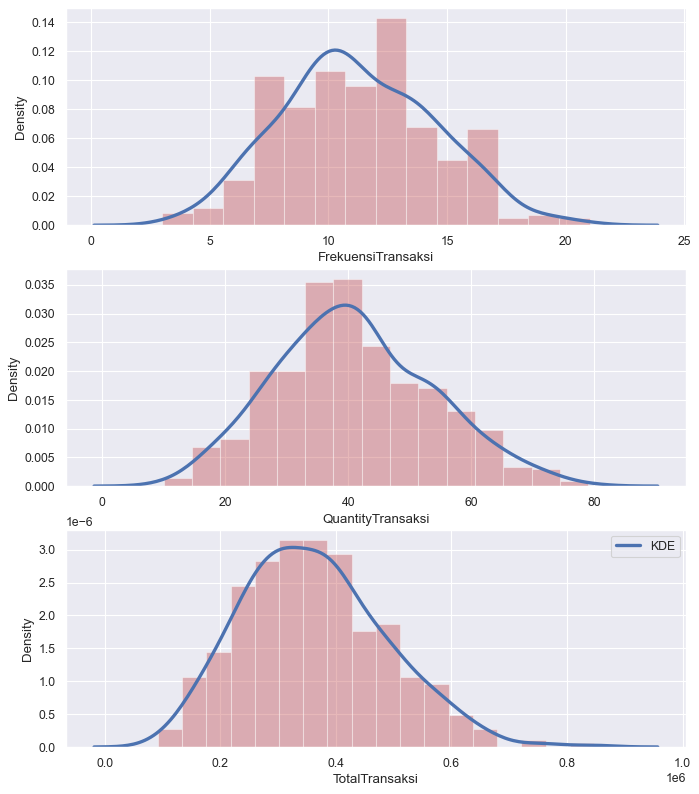

In [26]:
#Melihat distibusi data
plt.figure(figsize=(10,12), dpi=80)
plt.subplot(3,1,1)
sns.distplot(df_viz['FrekuensiTransaksi'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(df_viz['QuantityTransaksi'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(df_viz['TotalTransaksi'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

# Feature Engineering

**Scaling Data**

In [27]:
scaling = MinMaxScaler()
scaled = scaling.fit_transform(df_clus)
data_scaled = pd.DataFrame(scaled, columns=df_clus.columns)
data_scaled

,CustomerID,FrekuensiTransaksi,QuantityTransaksi,TotalTransaksi
0,0.000000,0.777778,0.724638,0.703949
1,0.002242,0.555556,0.681159,0.397827
2,0.004484,0.666667,0.666667,0.469255
3,0.006726,0.388889,0.521739,0.278823
4,0.008969,0.222222,0.246377,0.233899
...,...,...,...,...
442,0.991031,0.722222,0.710145,0.520806
443,0.993274,0.833333,0.753623,0.643520
444,0.995516,0.833333,0.840580,0.656109
445,0.997758,0.444444,0.463768,0.438908


In [28]:
data_scaled.drop(['CustomerID'], axis=1, inplace=True)

**Correlation Check**

In [29]:
penjualan_perbulan.max()

month         September
Penjualan    15600500.0
dtype: object

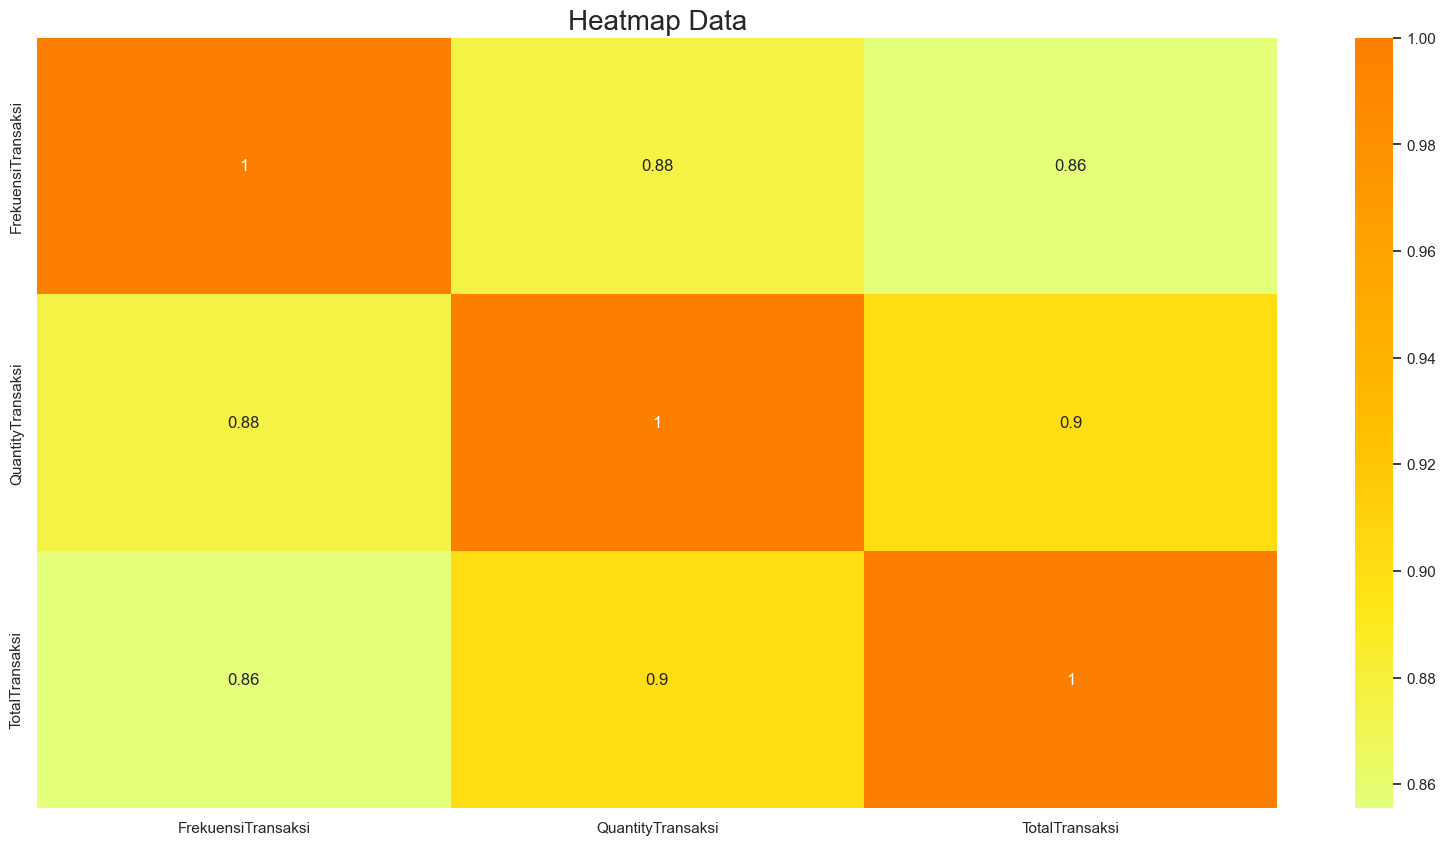

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data_scaled.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

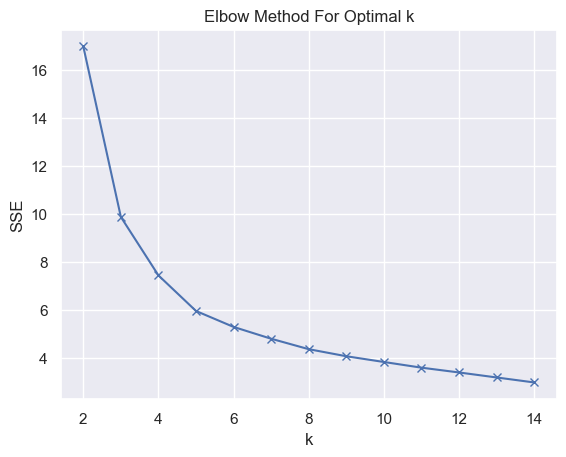

In [31]:
Sum_of_squared_error = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    Sum_of_squared_error.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
range_n_clusters = range(2,15)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47981313905566353
For n_clusters = 3, silhouette score is 0.43066357108296055
For n_clusters = 4, silhouette score is 0.36755972546792115
For n_clusters = 5, silhouette score is 0.344046219439289
For n_clusters = 6, silhouette score is 0.30125567410285564
For n_clusters = 7, silhouette score is 0.27770098709869384
For n_clusters = 8, silhouette score is 0.28090317939147336
For n_clusters = 9, silhouette score is 0.2700024576772601
For n_clusters = 10, silhouette score is 0.2678806830570858
For n_clusters = 11, silhouette score is 0.2695205885733489
For n_clusters = 12, silhouette score is 0.26870149325132703
For n_clusters = 13, silhouette score is 0.26488738233680253
For n_clusters = 14, silhouette score is 0.2579122164975157


In [33]:
cluster = KMeans(n_clusters=4, random_state=42)
cluster.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

In [34]:
# Menambahkan kolom baru berupa hasil segmentasi pelanggan
segment = pd.Series(cluster.labels_, name="segment")

In [35]:
df_new = pd.concat([df_clus, segment.set_axis(df_clus.index)], axis=1)
df_new.head()

,CustomerID,FrekuensiTransaksi,QuantityTransaksi,TotalTransaksi,segment
0,1,17,60,623300.0,3
1,2,13,57,392300.0,0
2,3,15,56,446200.0,3
3,4,10,46,302500.0,2
4,5,7,27,268600.0,1


In [36]:
def segment_name(x):
    if x == 0:
        return "Gold"
    elif x == 1:
        return "Bronze"
    elif x == 2:
        return "Silver"
    else:
        return "Platinum"
df_new['segment_name']=df_new['segment'].apply(segment_name)
df_new.head()

,CustomerID,FrekuensiTransaksi,QuantityTransaksi,TotalTransaksi,segment,segment_name
0,1,17,60,623300.0,3,Platinum
1,2,13,57,392300.0,0,Gold
2,3,15,56,446200.0,3,Platinum
3,4,10,46,302500.0,2,Silver
4,5,7,27,268600.0,1,Bronze


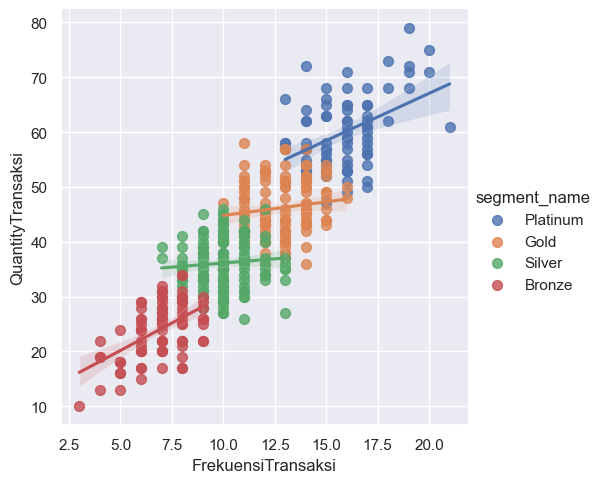

In [37]:
sns.lmplot(x='FrekuensiTransaksi', y='QuantityTransaksi', data=df_new, hue='segment_name', fit_reg=True, scatter_kws={"s": 50})

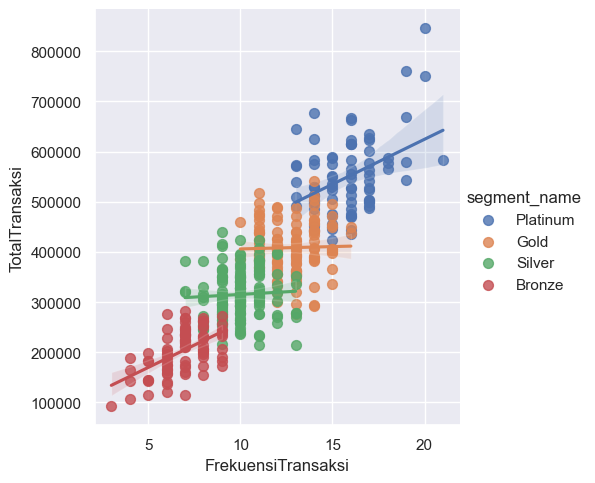

In [38]:
sns.lmplot(x='FrekuensiTransaksi', y='TotalTransaksi', data=df_new, hue='segment_name', fit_reg=True, scatter_kws={"s": 50})

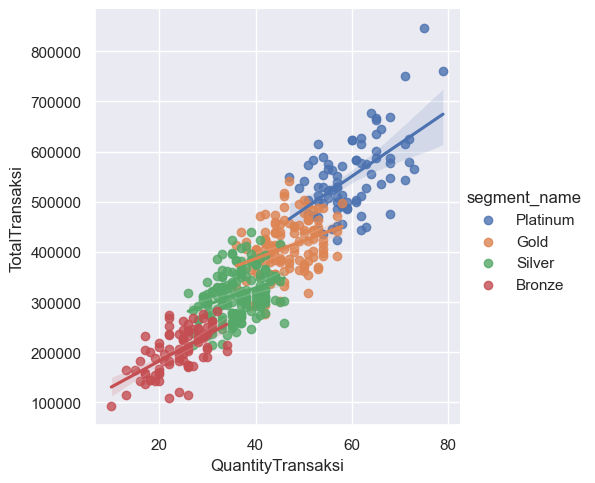

In [39]:
sns.lmplot(x='QuantityTransaksi', y='TotalTransaksi', data=df_new, hue='segment_name', fit_reg=True)

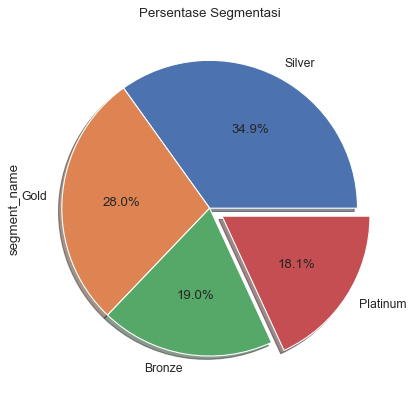

In [40]:
fig, axes = plt.subplots(figsize=(8, 6), dpi=80)
df_new['segment_name'].value_counts().head().plot.pie(autopct='%1.1f%%',shadow=True, ax=axes, explode=(0,0,0, 0.1))
axes.set_title('Persentase Segmentasi')
plt.show()

Summary hasil segmentasi 
1. **Platinum** : segment ini mengelompokkan customer yang memiliki frekuensi, total barang yang dibeli, dan uang yang dikeluarkan adalah yang paling banyak diantara customer yang lain. Untuk Frekuensinya berkisar antara 13 - 21, Total barang berjumlah 47 - 79, dan Amount sekitar 423.000 - 846.000
2. **Gold** : customer pada segment ini berada berada di urutan kedua, tepat dibawah platinum untuk frekuensi, Quantity, dan Amount transaksi. Untuk Frekuensinya berkisar antara 10 - 16, Total barang berjumlah 36 - 58, dan Amount sekitar 277.000 - 542.000
3. **Silver** : segment ini berada di tengah atau berada di urutan ketiga. Untuk Frekuensinya berkisar antara 7 - 13, Total barang berjumlah 26 - 46, dan Amount sekitar 215.000 - 440.000
4. **Bronze** : segment ini adalah segment yang tipe customernya paling sedikit dalam melakukan transaksi dan paling sedikit mengeluarkan uang. Untuk Frekuensinya berkisar antara 3 - 9, Total barang berjumlah 10 - 34, dan Amount sekitar 92.000 - 282.000

Rekomendasi 
1. **Platinum** : Customer di segment platinum dapat ditawarkan untuk menjadi member/loyalty program. Bisa juga tawarkan produk dengan harga yang lebih tinggi ataupun bisa merekomendasikan produk-produk yang sekiranya berkatian dengan behaviour customer. Atau bisa juga berikan hadiah ke customer agar customer dapat merasa lebih di perhatikan.
2. **Gold** :  Kita dapat membangun relasi dengan customer, mungkin dengan memberikan brand awareness dan merekomendasikan barang dari transaksi terakhir customer. Selain itu, kita bisa memberikan penawaran terbatas agar customer dapat segera berbelanja kembali
3. **Silver** : Customer di segment silver dapat kita rekomendasikan produk yang populer atau produk terbaru untuk menjangkau agar customer lebih terkoneksi dengan kita. Coba untuk berkomunikasi mungkin via email seperti ajakan untuk berbelanja kembali atau mungkin menyediakan resources yang sekiranya membantu customer untuk berbelanja kembali
4. **Bronze** : Kita perlu membuat kampanye agar customer lebih tertarik minimal sekedar melihat-lihat produk atau lebih membangkitkan brand awareness dan tawarkan produk yang relevan dan berikan harga spesial.